<a href="https://colab.research.google.com/github/arrowstoflight/AI/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dustin White

CAP4630 - Artificial Intelligence

Professor Wocjan

5 March 2020

Homework 3


# Problem 1


Implement the function ```get_random_data(w, b, mu, sigma, m)``` that generates random data for logisitic regression with two features features ```x_1``` and ```x_2```. This function should return the array ```data``` of shape ```(m, 2)``` and the array ```labels``` of shape ```(m, 1)```.


The entries of the arrays should be generated as follows.  For each row ```i in {0, 1, ..., m-1}```:

- Choose class label ```c=0``` with probability 1/2 and ```c=1``` with probability 1/2.  
- Choose the first feature ```x_1``` uniformly at random in the interval ```[0, 1)```. 
- Set the second feature ```x_2``` to be ```x_2 = w * x_1 + b + (-1)^c * n```, where the "noise" ```n``` is chosen according to the normal distribution with mean ```mu``` and standard deviation ```sigma```.
- The ith row of the array ```data``` consists of the features ```x_1``` and ```x_2```.
- The ith entry of the vector ```labels``` is the class label ```c```.

Implement the function ```display_random_data``` that takes as input the above two arrays ```labels``` and ```data```. It should create scatter plot of the 2D points stored in ```data```. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0. 

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line ```y = w * x + b```, where ```w``` and ```b``` are the parameters that you used to generate the data.  Note that the smaller the parameter ```mu```, the closer the points are to this line. Also, the larger the parameter ```sigma```, the more points can be on the wrong side of this line.

Experiment with different values of ```mu``` and ```sigma```.  Make sure that the parameter ```m``` is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

* <a href="https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.normal.html">Normal distribution</a>
* <a href="https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.uniform.html">Uniform distribution</a>

You can learn more about the normal distribution on [https://en.wikipedia.org/wiki/Normal_distribution](https://en.wikipedia.org/wiki/Normal_distribution). To gain some intuition, it would be helpful to plot the Gaussian function for different parameters ```mu``` and ```sigma``` in a seperate notebook (that you do not have to submit).  Later in the semester, you will need to work with normal distribution to understand variational autoencoders.

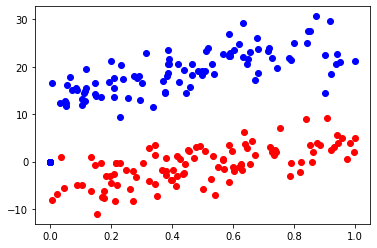

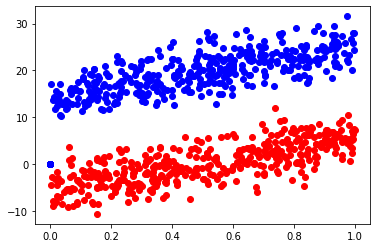

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#w: weight | b: bias | mu: mean | sigma: standard Deviation | n: noise | m: size of dataset
def get_random_data(w, b, mu, sigma, m):
  # Return a new array of given shape and type, filled with zeros, with shape m,1
  labels = np.zeros((m,1))
  # Return a new array of given shape and type, filled with zeros, with shape m,2
  data = np.zeros((m,2))

  # loop until we get the entire dataset filled out
  for i in range(0,m):
    #class label c=0 with probability 1/2 and c=1 with probability 1/2
    c = np.random.randint(0, 2)
    labels[i] = c

    # noise is chosen according to the normal distribution with mean mu and standard deviation sigma
    noise = np.random.normal(mu, sigma)
    x_1 = np.random.uniform(0.0, 1.0, 1)
    x_2 = w * x_1 + b + pow(-1,c) * noise
    data[i][0] = x_1
    data[i][1] = x_2
    #print("Labels " + str(i) + ": " + str(labels[i]))

  return data, labels

def display_random_data(data, labels):
  fig = plt.figure()
  axs = plt.axes()
  for i in range(data.shape[0]):
    if (labels[i] == 1):
      color = "red"
    elif (labels[i] == 0):
      color = "blue"
    axs.scatter(data[i][0], data[i][1], c = color)

# Main Starts here
m = 1000
allData, allLabels = get_random_data(10, 5, 10, 3, m)
training_data = np.zeros((m,2))
training_labels = np.zeros((m,1))
test_data = np.zeros((m,2))
test_labels = np.zeros((m,1))

# Split the data into 80% training and 20% test
for i in range(0, allData.shape[0]):
  if(i < allData.shape[0] * .8):
    training_data[i] = allData[i]
  elif(i >= allData.shape[0] * .8):
    test_data[i] = allData[i]

# Split the labels into 80% training and 20% test
for i in range(0, allLabels.shape[0]):
  if(i < allLabels.shape[0] * .8):
    training_labels[i] = allLabels[i]
  elif(i >= allLabels.shape[0] * .8):
    test_labels[i] = allLabels[i]

# Display the two data sets
display_random_data(test_data, test_labels)
display_random_data(training_data, training_labels)

**The top plot displays the test data set and the bottom plot shows the training data set.**

# Problem 2


Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss. 

How well does the trained model separate the red and blue dots?  You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function ```get_weights```. See [https://keras.io/layers/about-keras-layers/](https://keras.io/layers/about-keras-layers/).  

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer).  This is not immediately obvious.  It maybe helpful to take a look at the heatmap below.

The trained model realizes function ```f : R^2 -> R``` that takes two features as input and outputs a number in the interval ```[0, 1]```. Use a heatmap to visualize this function. 

**Code was referenced from the professors <a href="https://github.com/schneider128k/machine_learning_course/blob/master/imdb_movie_reviews_classification_dense_layers.ipynb">github</a>**

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

# build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=20, batch_size=512, validation_data = (test_data, test_labels))

Epoch 1/20
2/2 [==============================] - 0s 79ms/step - loss: 1.1470 - accuracy: 0.6800 - val_loss: 0.7423 - val_accuracy: 0.1500
Epoch 2/20
2/2 [==============================] - 0s 15ms/step - loss: 1.1396 - accuracy: 0.5750 - val_loss: 0.7429 - val_accuracy: 0.1500
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 1.1363 - accuracy: 0.5750 - val_loss: 0.7435 - val_accuracy: 0.1500
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 1.1372 - accuracy: 0.5750 - val_loss: 0.7440 - val_accuracy: 0.1500
Epoch 5/20
2/2 [==============================] - 0s 15ms/step - loss: 1.1312 - accuracy: 0.5750 - val_loss: 0.7445 - val_accuracy: 0.1500
Epoch 6/20
2/2 [==============================] - 0s 16ms/step - loss: 1.1290 - accuracy: 0.5750 - val_loss: 0.7449 - val_accuracy: 0.1500
Epoch 7/20
2/2 [==============================] - 0s 16ms/step - loss: 1.1293 - accuracy: 0.5750 - val_loss: 0.7454 - val_accuracy: 0.1500
Epoch 8/20
2/2 [===========

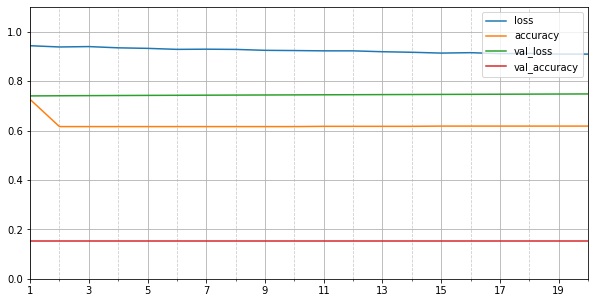

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1.1) 
plt.gca().set_xlim(0, 19)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

## **HeatMap**

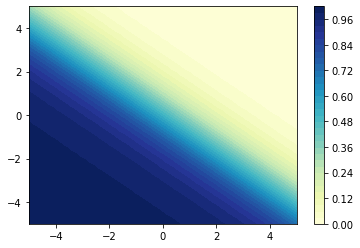

In [15]:
x = np.linspace(-5, 5, 35)
y = np.linspace(-5, 5, 35)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
plt.tricontourf(X, Y, Z, 35, cmap='YlGnBu')
plt.colorbar();

## Pull Weights and Bias from Model

In [6]:
# Get Weights of the model
weight = model.layers[0].get_weights()[0]
#Store weight 1 and 2
weight_1 = weight[0]
weight_2 = weight[1]
#Bias
bias = model.layers[0].get_weights()[1]

print("Weight 1: " + str(weight_1))
print("Weight 2: " + str(weight_2))
print("Bias: " + str(bias))

Weight 1: [-0.8468778]
Weight 2: [-1.0160761]
Bias: [0.04880993]


# Problem 3


Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to ```w``` and ```b```. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

**The Linear regression using stochastic gradient descent code was referenced from Professor Wocjan's online code, found <a href="https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb">here</a> and <a href="https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu#scrollTo=gpUiggnZ35PN">here</a>**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square


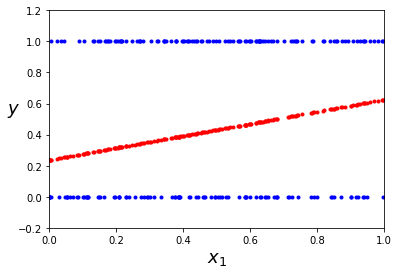

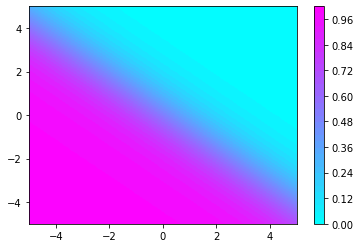

In [27]:
train_xs = training_data
train_ys = training_labels
# test set
test_xs = test_data
test_ys = test_labels

# number of epochs
epochs = 20
# learning rate
lr = 0.01

# initial value for weight w and bias b
w = np.random.randn(1)
b = np.zeros(1)

for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w * train_xs[i] + b
    
    grad_w = (y_pred - train_ys[i]) * train_xs[i]
    grad_b = (y_pred - train_ys[i])
    
    w = w - lr * grad_w
    b = b - lr * grad_b

test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w * test_xs[i] + b - test_ys[i]) ** 2
test_loss /= 20

pred_ys = w * test_xs + b

# Plot
plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.2, 1.2])
plt.show()

# HeatMap
x = np.linspace(-5, 5, 35)
y = np.linspace(-5, 5, 35)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
plt.tricontourf(X, Y, Z, 35, cmap='cool')
plt.colorbar();